In [1]:
import seaborn as sns 
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18, 'lines.markeredgewidth': 5})
# sns.set_style(style='ticks')

In [22]:
import pathlib
import json 

def get_data_from_dir(root_data_dir, fxn, seeds):
    all_data = pd.DataFrame(columns=["train", "function", "seed", "total_acc", "fxn_acc"], dtype=object)
    root_data_dir = pathlib.Path(root_data_dir).joinpath(str(fxn))
    for seed in seeds:
        data_dir = root_data_dir.joinpath(f"{seed}_seed")
        print(data_dir)
        print(data_dir.glob("*/test_metrics.json"))
        for path in data_dir.glob("*/test_metrics.json"):
            data = json.load(open(path))
            setting = path.parent.name
            num_train, num_fxn = setting.split("_")
            num_train, num_fxn = int(num_train), int(num_fxn)

            to_add = {"train": str(num_train), "function": num_fxn, "seed": seed, 
                     "total_acc": data['acc'], "fxn_acc": data[f"{fxn}_acc"]}
            all_data = all_data.append(to_add, ignore_index=True)
    print(all_data.head())
    return all_data 

def plot(data_dir, fxn, seeds = [12, 31, 50], title=None, savepath=None, fixed_axis=False, xs = [750, 1500, 3000, 7500, 15000, 18000], ax = None):

    data = get_data_from_dir(data_dir, fxn, seeds)
    data = data[data['function'] == 15.0]
    col_names = ["train", "total_acc", "fxn_acc"]
    minor_data = data[col_names]
    minor_data = pd.melt(minor_data, id_vars=['train'])

    if ax is None:
        fig, ax = plt.subplots()


    sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 
    sns.lineplot(data=minor_data, 
                x="train", 
                y="value",  
                hue="variable", 
                err_style="bars", 
                err_kws={"capsize":7, "markeredgewidth":2,  "elinewidth":2}, 
                marker = "o", 
                markersize=7,
                linewidth=3,
                ax=ax)
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
    sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 

    # for i, num in enumerate(xs):
    #     for var in [f'{prefix}_em', f'{prefix}_coarse', f'{prefix}_fine']:
    #         data_subset = minor_data[minor_data['train'] == str(num)] 
    #         data_subset = data_subset[data_subset['variable'] == var]
    #         mean_value = data_subset.mean()['value']
    #         ax.annotate(f"{mean_value:.2f}", (i, mean_value))

    if fixed_axis:
        ax.ylim(20, 100)

    # sns.set(font_scale = 1.1)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("Total Training Examples")
    try:
        legend = ax.get_legend()
        handles, labels = legend.legendHandles, legend.texts

        # text_labels = []
        # for i, text in enumerate(labels):
        #     text_labels.append(name_lookup[text._text])

        # ax.legend(handles, text_labels)
    except AttributeError:
        pass


    # sns.set(font_scale = 1.1)

    if savepath is not None:
        plt.tight_layout()
        plt.savefig(savepath)



/srv/local1/estengel/intent/50/12_seed
<generator object Path.glob at 0x7fe77a6aa258>
/srv/local1/estengel/intent/50/31_seed
<generator object Path.glob at 0x7fe77a861258>
/srv/local1/estengel/intent/50/64_seed
<generator object Path.glob at 0x7fe77a861258>
  train function seed  total_acc   fxn_acc
0   750        7   12   0.731040  0.345611
1   750       15   12   0.740602  0.660714
2   750       30   12   0.740681  0.840597
3   750       75   12   0.723647  0.847911
4  1500        7   12   0.809069  0.469974


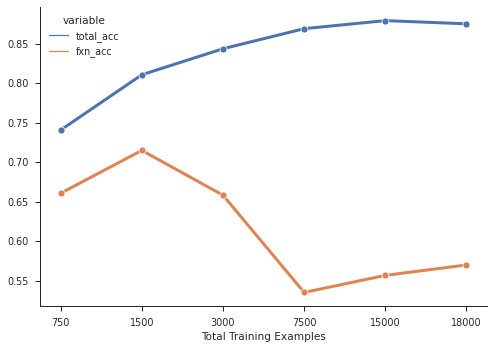

In [23]:
# lot(data_dir, title, savepath=None, fixed_axis=False, xs = [750, 1500, 3000, 7500, 15000, 18000], ax = None

plot("/srv/local1/estengel/intent/", 50, [12, 31, 64])